In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek


In [3]:
df=pd.read_csv('fifa_eda.csv')

In [4]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [6]:
df.drop(columns=['ID','Overall','Height','Release Clause','International Reputation','Weight'])

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,Skill Moves,Position,Joined,Contract Valid Until
0,L. Messi,31,Argentina,94,FC Barcelona,110500.0,565.0,Left,4.0,RF,2004,2021-01-01
1,Cristiano Ronaldo,33,Portugal,94,Juventus,77000.0,405.0,Right,5.0,ST,2018,2022-01-01
2,Neymar Jr,26,Brazil,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,LW,2017,2022-01-01
3,De Gea,27,Spain,93,Manchester United,72000.0,260.0,Right,1.0,GK,2011,2020-01-01
4,K. De Bruyne,27,Belgium,92,Manchester City,102000.0,355.0,Right,4.0,RCM,2015,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,65,Crewe Alexandra,60.0,1.0,Right,2.0,CM,2017,2019-01-01
18203,N. Christoffersson,19,Sweden,63,Trelleborgs FF,60.0,1.0,Right,2.0,ST,2018,2020-01-01
18204,B. Worman,16,England,67,Cambridge United,60.0,1.0,Right,2.0,ST,2017,2021-01-01
18205,D. Walker-Rice,17,England,66,Tranmere Rovers,60.0,1.0,Right,2.0,RW,2018,2019-01-01


In [7]:
df.shape

(18207, 18)

In [8]:
print(df.duplicated().sum())

0


In [9]:
df.dropna(how='all',inplace=True)

In [10]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [11]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].median())    

In [14]:
categorized_col=df.select_dtypes(include='object').columns
for col in categorized_col:
    df[col]=LabelEncoder().fit_transform(df[col])

In [15]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,9632,31,6,94,94,212,110500.0,565.0,0,5.0,4.0,21,2004,29,5.583333,159.0,226500.0
1,20801,3153,33,123,94,94,326,77000.0,405.0,1,5.0,5.0,26,2018,30,6.166667,183.0,127100.0
2,190871,12508,26,20,92,93,435,118500.0,290.0,1,5.0,5.0,14,2017,30,5.750000,150.0,228100.0
3,193080,4136,27,139,91,93,375,72000.0,260.0,1,4.0,1.0,5,2011,25,6.333333,168.0,138600.0
4,192985,8617,27,13,91,92,374,102000.0,355.0,1,4.0,4.0,19,2015,31,5.916667,154.0,196400.0


In [16]:
df.drop(columns=['ID','Overall','Height','Release Clause','International Reputation','Weight'],inplace=True)

In [17]:
df.head()

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,Skill Moves,Position,Joined,Contract Valid Until
0,9632,31,6,94,212,110500.0,565.0,0,4.0,21,2004,29
1,3153,33,123,94,326,77000.0,405.0,1,5.0,26,2018,30
2,12508,26,20,93,435,118500.0,290.0,1,5.0,14,2017,30
3,4136,27,139,93,375,72000.0,260.0,1,1.0,5,2011,25
4,8617,27,13,92,374,102000.0,355.0,1,4.0,19,2015,31


In [21]:
column_to_scale=['Age','Potential','Wage','Skill Moves']
scaler=StandardScaler()
df[column_to_scale]=scaler.fit_transform(df[column_to_scale])

In [22]:
df.head()

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,Skill Moves,Position,Joined,Contract Valid Until
0,9632,1.258678,6,3.698092,212,110500.0,25.240993,0,2.170641,21,2004,29
1,3153,1.686961,123,3.698092,326,77000.0,17.967832,1,3.494491,26,2018,30
2,12508,0.187972,20,3.535128,435,118500.0,12.740247,1,3.494491,14,2017,30
3,4136,0.402113,139,3.535128,375,72000.0,11.376529,1,-1.800906,5,2011,25
4,8617,0.402113,13,3.372164,374,102000.0,15.694969,1,2.170641,19,2015,31


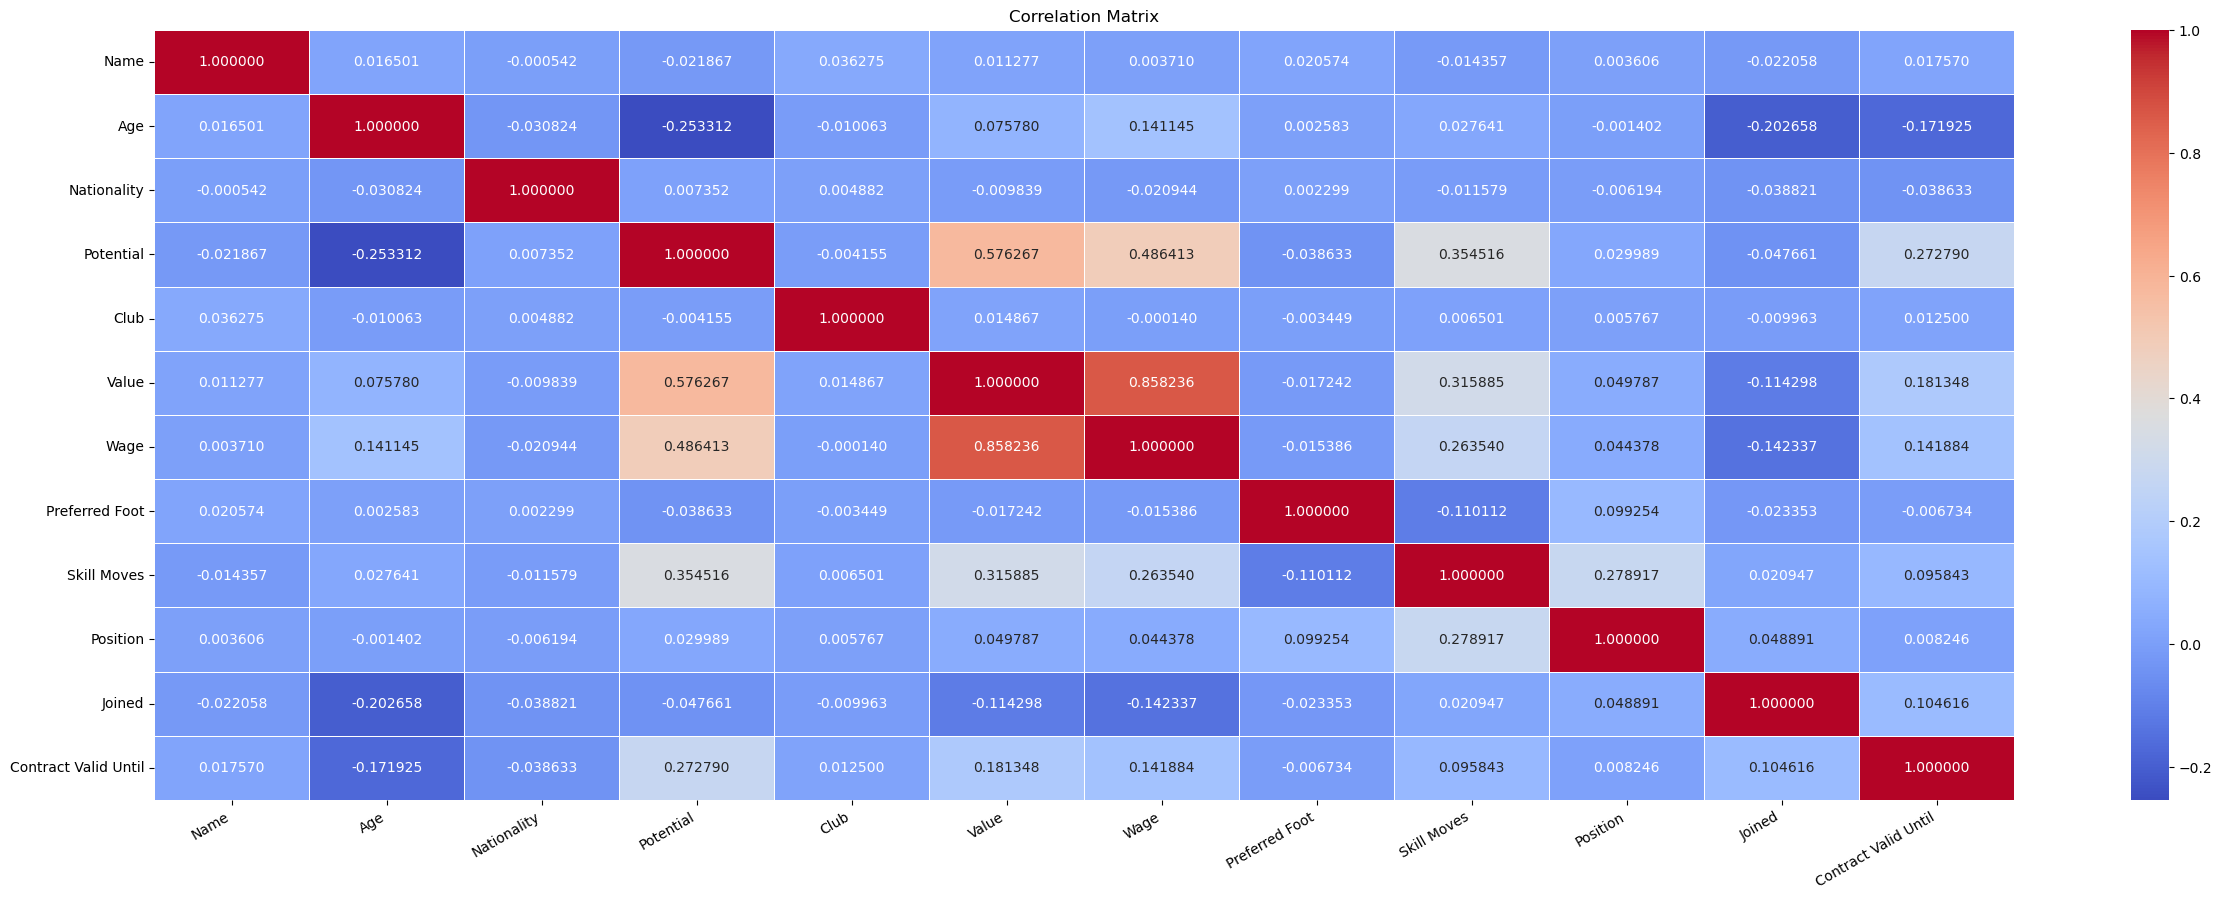

In [26]:
corr_matrix=df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='2f', linewidth=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30,ha='right')
plt.show()

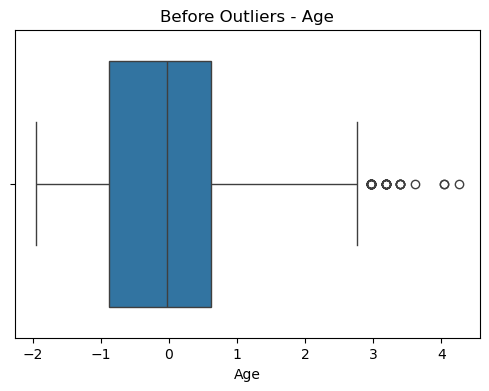

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Before Outliers - Age')
plt.show()

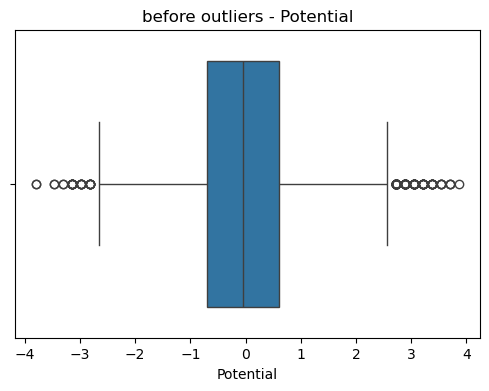

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Potential'])
plt.title('before outliers - Potential')
plt.show()

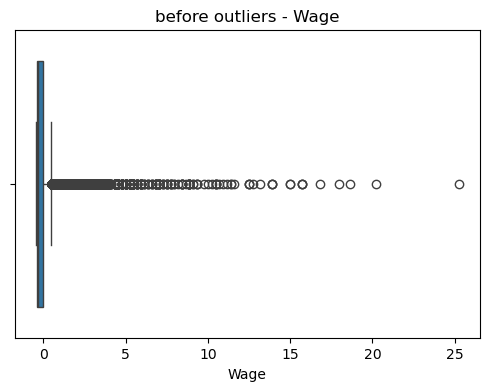

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Wage'])
plt.title('before outliers - Wage')
plt.show()

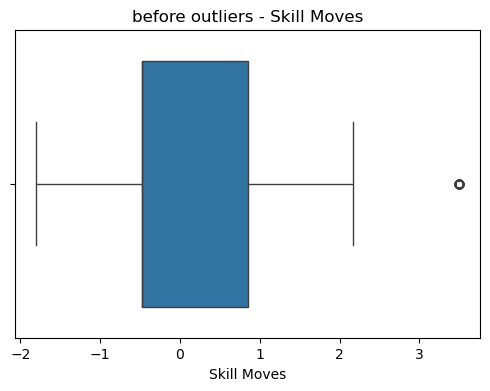

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Skill Moves'])
plt.title('before outliers - Skill Moves')
plt.show()

In [37]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
lower= Q1-1.5*IQR 
upper= Q3+1.5*IQR
df=df[(df['Age']>=lower) & (df['Age']<=upper) ]

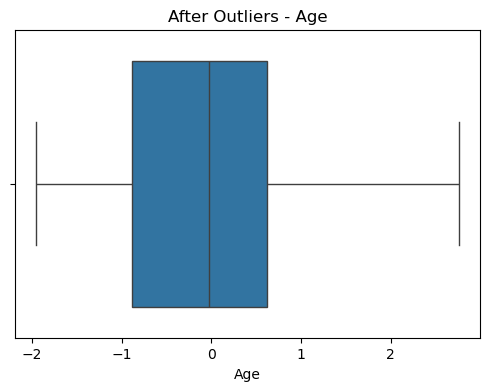

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('After Outliers - Age')
plt.show()

In [40]:
Q1 = df['Potential'].quantile(0.25)
Q3 = df['Potential'].quantile(0.75)
IQR = Q3-Q1
lower= Q1-1.5*IQR 
upper= Q3+1.5*IQR
df=df[(df['Potential']>=lower) & (df['Potential']<=upper) ]

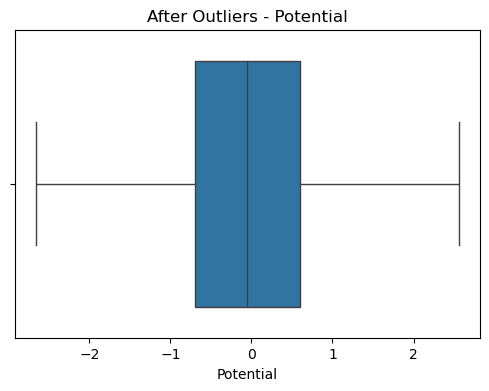

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Potential'])
plt.title('After Outliers - Potential')
plt.show()

In [44]:
Q1 = df['Wage'].quantile(0.25)
Q3 = df['Wage'].quantile(0.75)
IQR = Q3-Q1
lower= Q1-1.5*IQR 
upper= Q3+1.5*IQR
df=df[(df['Wage']>=lower) & (df['Wage']<=upper) ]

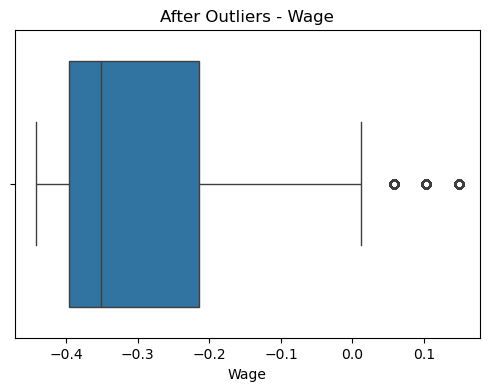

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Wage'])
plt.title('After Outliers - Wage')
plt.show()

In [46]:
Q1 = df['Skill Moves'].quantile(0.25)
Q3 = df['Skill Moves'].quantile(0.75)
IQR = Q3-Q1
lower= Q1-1.5*IQR 
upper= Q3+1.5*IQR
df=df[(df['Skill Moves']>=lower) & (df['Skill Moves']<=upper) ]

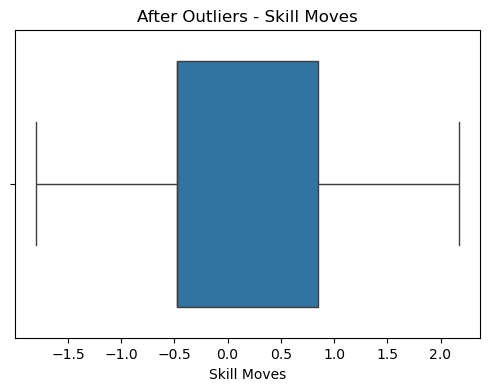

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Skill Moves'])
plt.title('After Outliers - Skill Moves')
plt.show()

In [49]:
print(df['Contract Valid Until'].value_counts())

Contract Valid Until
3     4613
29    3532
25    3333
30     909
0      849
31     778
21     625
2      121
19      46
17      13
28       7
7        6
22       5
11       5
4        5
8        4
9        3
15       3
33       3
23       2
32       2
1        2
20       1
24       1
34       1
13       1
18       1
5        1
26       1
12       1
16       1
10       1
14       1
Name: count, dtype: int64


In [50]:
X=df.drop(columns='Contract Valid Until')
y=df['Contract Valid Until']

In [71]:
balance=TomekLinks()
#balance = SMOTETomek(random_state=42)
X_resampled, y_resampled = balance.fit_resample(X,y)
print(f'Resampled Size: {y_resampled.value_counts()}')

Resampled Size: Contract Valid Until
3     2876
29    2073
25    1935
30     438
0      388
31     368
21     276
2       55
19      24
7        5
28       4
33       3
15       3
11       2
1        2
17       2
34       1
4        1
5        1
24       1
8        1
22       1
23       1
9        1
26       1
14       1
Name: count, dtype: int64


In [72]:
X=X_resampled
y=y_resampled

In [73]:
df=pd.concat([X,y],axis=1)
df.to_csv('fifa_eda_updated(1).csv',index=False)